# Import necessary libiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
sns.set()

# Load data

In [2]:
raw_data = pd.read_csv("Ecommerce Customers")
raw_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data = raw_data.copy()
data.drop(columns=["Email","Address","Avatar"],inplace=True)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


# Description of data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Data Cleaning & Preprocessing

### Explore missing values

In [6]:
data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### Explore duplicates

In [7]:
data.duplicated().sum()

0

### Explore outliers

In [8]:
def Z_score(col):
    mean = col.mean()
    std = col.std()
    z_score = [((i-mean)/std).round(3) for i in col]
    return z_score

In [9]:
Z_scores = {}
for i in data.columns:
    Z_scores.update({i:Z_score(data[i])})
Z_score_df = pd.DataFrame(Z_scores)
Z_score_df


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.455,0.607,2.491,0.550,1.118
1,-1.135,-0.949,0.206,-0.870,-1.350
2,-0.053,-0.726,0.050,0.571,-0.148
3,1.262,1.675,-0.336,-0.414,1.041
4,0.280,0.747,0.471,0.914,1.262
...,...,...,...,...,...
495,0.186,1.522,-0.636,0.213,0.940
496,1.662,-0.359,0.128,0.043,0.375
497,-0.409,-0.556,1.259,1.426,0.659
498,0.271,0.341,-0.218,-1.198,-0.540


In [10]:
cols = Z_score_df.columns
print("Outliers:\n")
for i in cols:
    print(Z_score_df[i][(Z_score_df[i]>=3) | (Z_score_df[i]<=-3)])
    print('-'*11)

Outliers:

12    -3.547
154    3.110
Name: Avg. Session Length, dtype: float64
-----------
65     3.092
309   -3.565
442   -3.404
Name: Time on App, dtype: float64
-----------
157   -3.114
Name: Time on Website, dtype: float64
-----------
157    3.392
447   -3.266
Name: Length of Membership, dtype: float64
-----------
65     3.356
157    3.088
225   -3.059
Name: Yearly Amount Spent, dtype: float64
-----------


### Visualize Outliers Using Box plot & IQR

In [11]:
Q1 = [np.percentile(data[i],25) for i in cols]
Q3 = [np.percentile(data[i],75) for i in cols]
IQR = [(Q3[i]-Q1[j]) for i,j in zip(range(len(Q3)),range(len(Q1)))]
IQR

[1.3701630194366956,
 1.3656963511130957,
 1.3671749461357976,
 1.1960522346036888,
 104.27555053652014]

In [12]:
lower_fence = [(Q1[i]- (1.5*IQR[j])) for i,j in zip(range(len(Q1)),range(len(IQR)))]
upper_fence = [(Q3[i]+ (1.5*IQR[j])) for i,j in zip(range(len(Q3)),range(len(IQR)))]
print(f"Lower Fence = Q1 - 1.5*IQR \n= {lower_fence}\n")
print(f"Upper Fence = Q3 + 1.5*IQR \n= {upper_fence}\n")

Lower Fence = Q1 - 1.5*IQR 
= [30.28657747536273, 9.3396088251313, 34.29849491039147, 1.136371357955959, 288.62495124023667]

Upper Fence = Q3 + 1.5*IQR 
= [35.767229553109516, 14.802394229583683, 39.76719469493466, 5.920580296370714, 705.7271533863172]



In [13]:
outliers_col_1 = data[cols[0]][(data[cols[0]] < lower_fence[0]) | (data[cols[0]] > upper_fence[0])]
outliers_col_1

12     29.532429
154    36.139662
390    35.860237
Name: Avg. Session Length, dtype: float64

In [14]:
outliers_col_2 = data[cols[1]][(data[cols[1]] < lower_fence[1]) | (data[cols[1]] > upper_fence[1])]
outliers_col_2

65     15.126994
309     8.508152
362     9.316289
442     8.668350
Name: Time on App, dtype: float64

In [15]:
outliers_col_3 = data[cols[2]][(data[cols[2]] < lower_fence[2]) | (data[cols[2]] > upper_fence[2])]
outliers_col_3

69     40.005182
157    33.913847
Name: Time on Website, dtype: float64

In [16]:
outliers_col_4 = data[cols[3]][(data[cols[3]] < lower_fence[3]) | (data[cols[3]] > upper_fence[3])]
outliers_col_4

50     5.976768
151    6.401229
153    6.076654
157    6.922689
161    0.968622
173    0.801516
225    0.789520
303    1.084585
379    1.130477
396    6.115199
434    0.936498
447    0.269901
Name: Length of Membership, dtype: float64

In [17]:
outliers_col_5 = data[cols[4]][(data[cols[4]] < lower_fence[4]) | (data[cols[4]] > upper_fence[4])]
outliers_col_5

50     725.584814
65     765.518462
157    744.221867
205    712.396327
225    256.670582
299    282.471246
303    266.086341
368    708.935185
415    275.918421
Name: Yearly Amount Spent, dtype: float64

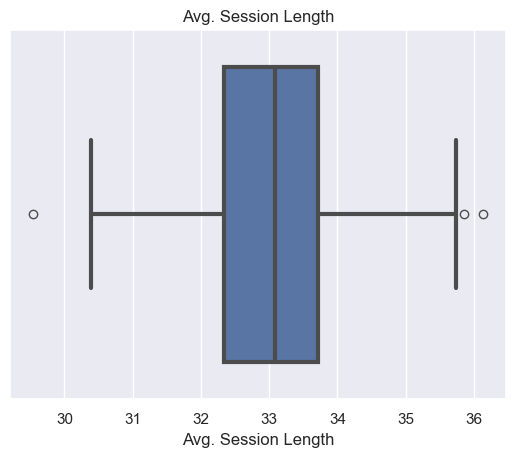

In [18]:
plt.scatter(range(len(outliers_col_1)),outliers_col_1.values,color="r",s=22)
sns.boxplot(x=data[cols[0]],linewidth=3)
plt.title(cols[0])
plt.show()

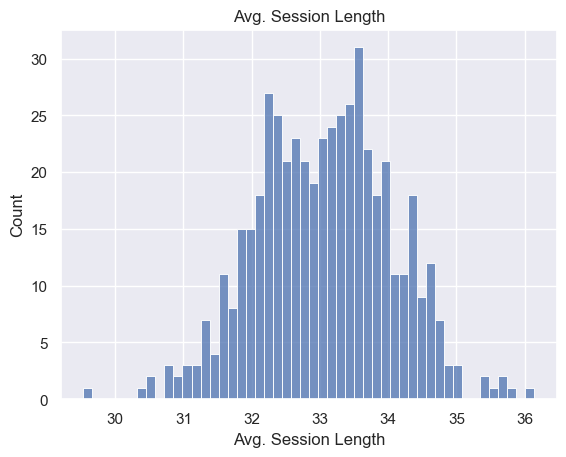

In [19]:
sns.histplot(data[cols[0]],bins=50)
plt.title(cols[0])
plt.show()

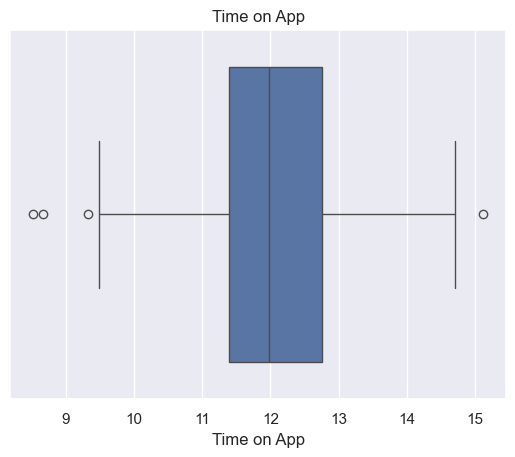

In [20]:
sns.scatterplot(x=range(len(outliers_col_2)),y=outliers_col_2.values,color='r')
sns.boxplot(x=data[cols[1]])
plt.title(cols[1])
plt.show()

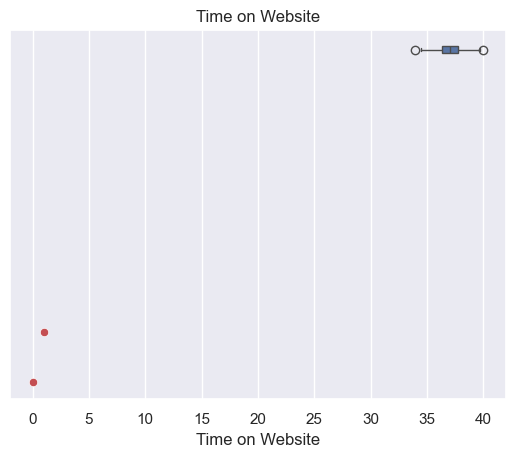

In [21]:
sns.boxplot(x=data[cols[2]])
sns.scatterplot(x=range(len(outliers_col_3)),y=outliers_col_3.values,color='r')
plt.title(cols[2])
plt.show()

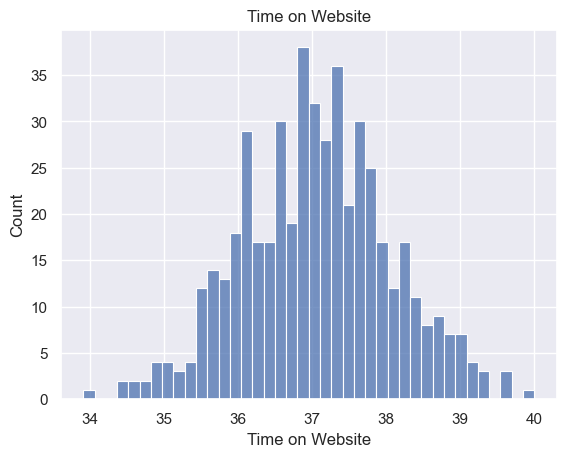

In [22]:
sns.histplot(data[cols[2]],bins=40)
plt.title(cols[2])
plt.show()

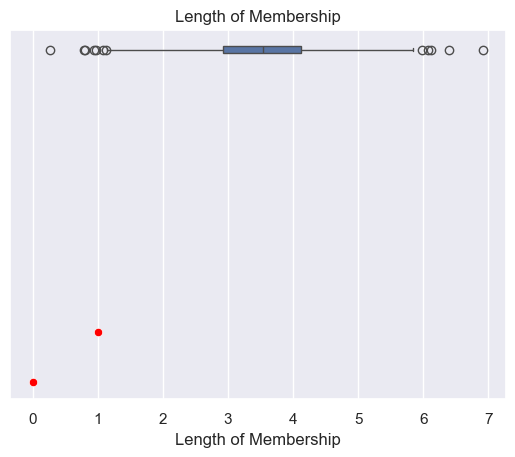

In [23]:
sns.boxplot(x=data[cols[3]])
sns.scatterplot(x=range(len(outliers_col_3)),y=outliers_col_3.values,color="red")
plt.title(cols[3])
plt.show()

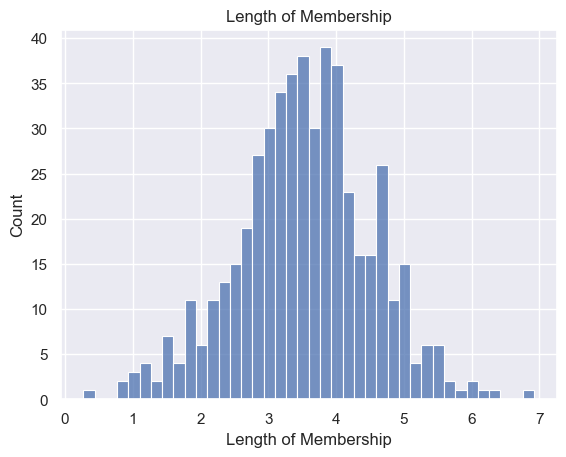

In [24]:
sns.histplot(data[cols[3]],bins=40)
plt.title(cols[3])
plt.show()

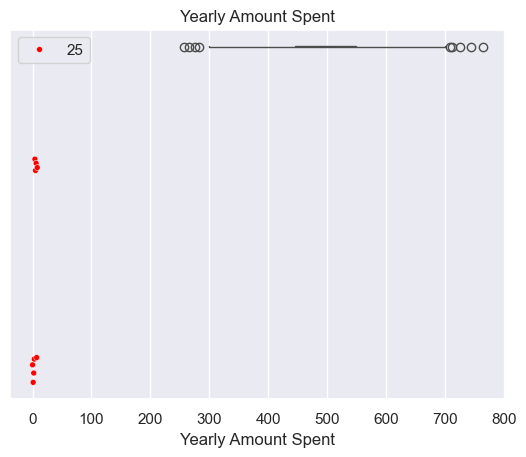

In [25]:
sns.boxplot(x=data[cols[4]])
sns.scatterplot(x=range(len(outliers_col_5)),y=outliers_col_5.values,color='red',size=25)
plt.title(cols[4])
plt.show()

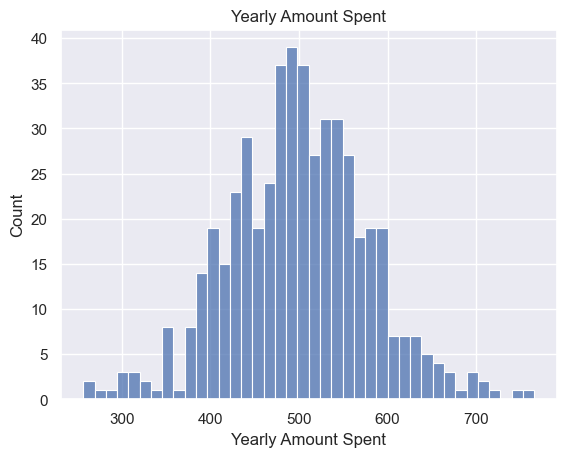

In [26]:
sns.histplot(data[cols[4]],bins=40)
plt.title(cols[4])
plt.show()

# Handling Outliers

First Let's Explore Data Skewness To Identify Sutable Method For Handling Outliers

In [27]:
data.skew()

Avg. Session Length    -0.032175
Time on App            -0.089121
Time on Website         0.012142
Length of Membership   -0.106608
Yearly Amount Spent     0.034790
dtype: float64

In [28]:
data.skew().sum()

-0.18097189326461172

we note the skewness in each column is very small near to 0, meaning near to normally distributed also same thing in sum of skewness in overall data<br>Now in fact if you don't apply Handling Outliers techniques this not affected more on data quality for analysis and modeling,<br>But I will apply it to try reach perfect version from the data<br>.In this case the good method is **Standard Deviation** method<br>&emsp;because this method push data into normal distribution and data itself near to normalty distributed 

### *Standard Deviation Method*

In [29]:
# copy same data into new data frame
new_df = data.copy()

In [30]:
# Drfine user defined function Std_Dev()
def Std_Dev_Method(col):
    mean = new_df[col].mean()
    std = new_df[col].std()
    lower_threshold = mean - (3 * std)
    upper_threshold = mean + (3 * std)
    return np.where(new_df[col] > upper_threshold,upper_threshold,
            np.where(new_df[col] < lower_threshold,
                    lower_threshold,data[col]))

In [31]:
# apply function on each column in data
cols = new_df.columns
for i in cols:
    new_df[i] = Std_Dev_Method(i)

In [32]:
# Show Skewness after applying Std_Dev_Method()
new_df.skew()

Avg. Session Length    -0.005558
Time on App            -0.038435
Time on Website         0.017922
Length of Membership   -0.115717
Yearly Amount Spent     0.013851
dtype: float64

In [33]:
new_df.skew().sum()

-0.127937815756731

In [34]:
print(data.skew().sum().round(2))
print(new_df.skew().sum().round(2))

-0.18
-0.13


. note: we success reduce skewness of the data thus this reduction is small that I mentioned befor<br>In any way it's good!  

# Exploratory Data Analysis (EDA)

In [35]:
new_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.054062,12.054231,37.060676,3.533210,499.252989
std,0.988325,0.987359,1.009783,0.995094,79.063363
min,30.075504,9.069841,34.028979,0.535629,261.369694
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.030883,15.035135,40.005182,6.531294,737.258383


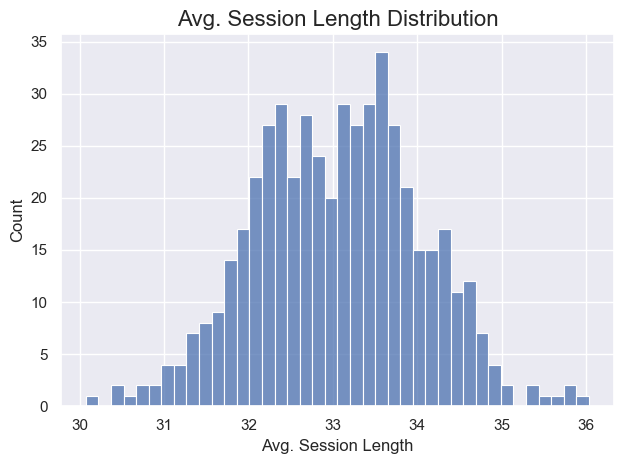

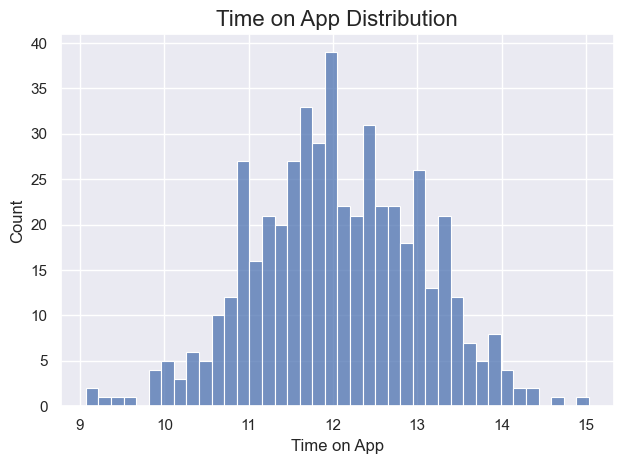

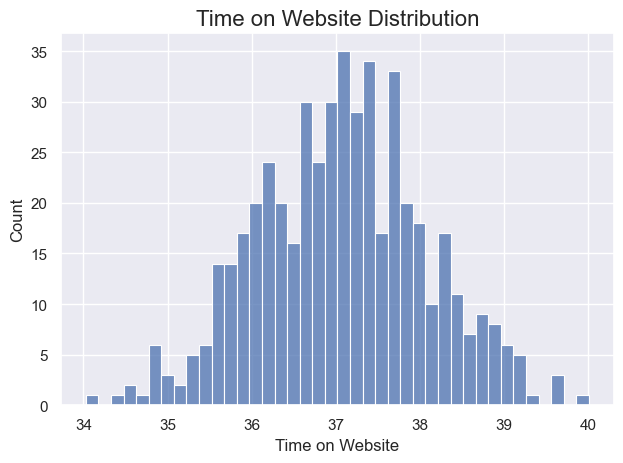

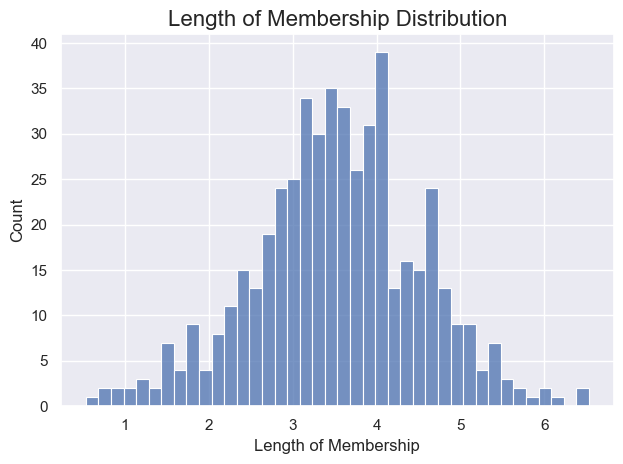

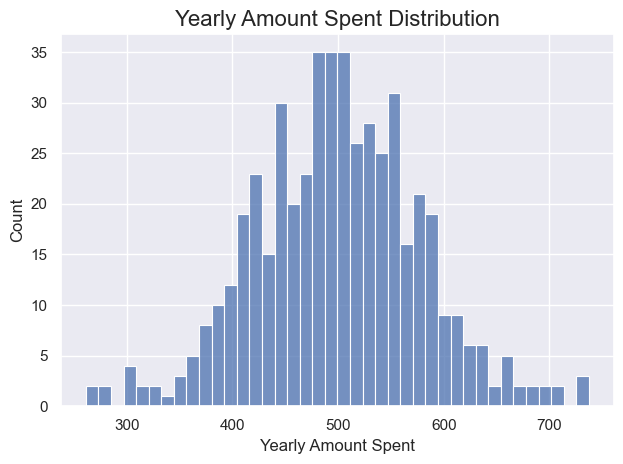

In [36]:
for col in cols:
    sns.histplot(x=col,data=new_df,bins=40)
    plt.title(f"{col} Distribution",fontsize=16)
    plt.tight_layout()
    plt.show()

*note:* Data Distributions seem good and homogenous<br>lools like normally distributed 

In [37]:
avg_session_length = new_df["Avg. Session Length"]
timeOn_app = new_df["Time on App"]
timeOn_website = new_df["Time on Website"]

NameError: name 'pkt' is not defined

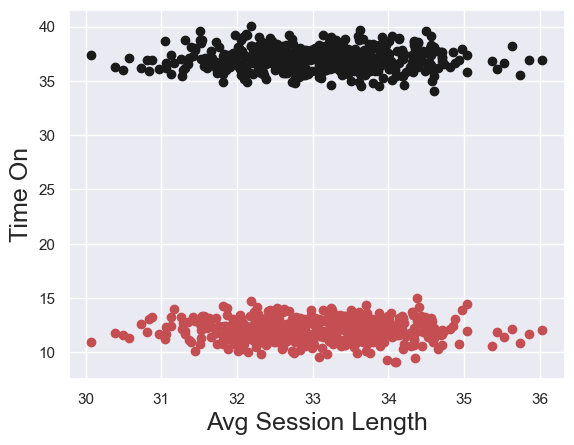

In [38]:
plt.scatter(avg_session_length,timeOn_app,c='r',label='App')
plt.scatter(avg_session_length,timeOn_website,c='k',label='Website')
plt.xlabel("Avg Session Length",fontsize=18)
plt.ylabel("Time On",fontsize=18)
pkt.legend()
plt.show()

In [ ]:
plt.scatter(timeOn_website,timeOn_app,c='r',label='App')
plt.xlabel("Time On Website",fontsize=18)
plt.ylabel("Time On App",fontsize=18)
plt.legend()
plt.show()

### Explore Correlations Numerically

In [ ]:
new_df.corr()

*. result:*<br>*The correlation coefs* near to 0, <br>*this indicate to:*<br>&emsp;there is little linear relationship between variables<br>*means:*<br>&emsp;changing in one variable not systematically changing in other variabless<br><br> __Remember Correlation not implies Causation__ 

# Linear Regression

To more understand and ensure of linear relationships we will use _linear regression model_ to test these relationships statisticaly and show *residuals plot*

In [39]:
#define independant variable
X = new_df.drop(columns="Avg. Session Length")
# add a constant
X = sms.add_constant(X)
#define dependant variable
y = new_df["Avg. Session Length"]
#define and train model
model = sms.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Avg. Session Length   R-squared:                       0.866
Model:                             OLS   Adj. R-squared:                  0.865
Method:                  Least Squares   F-statistic:                     797.7
Date:                 Thu, 14 Nov 2024   Prob (F-statistic):          3.43e-214
Time:                         05:21:50   Log-Likelihood:                -201.18
No. Observations:                  500   AIC:                             412.4
Df Residuals:                      495   BIC:                             433.4
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.9730      0.630     63.452      0.000      38.735      41.211
Time on App             -1.3071      0.028    -46.481      0.000      -1.362      -1.252
Time on Website         -0.0170      0.016     -1.051      0.294      -0.049       0.015
Length of Membership    -2.0669      0.041    -50.226      0.000      -2.148      -1.986
Yearly Amount Spent      0.0336      0.001     56.313      0.000       0.032       0.035
==============================================================================
Omnibus:                        1.976   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.758
Skew:                           0.121   Prob(JB):                        0.415
Kurtosis:                       3.162   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
predicted = model.predict(X)
residuals = y - predicted

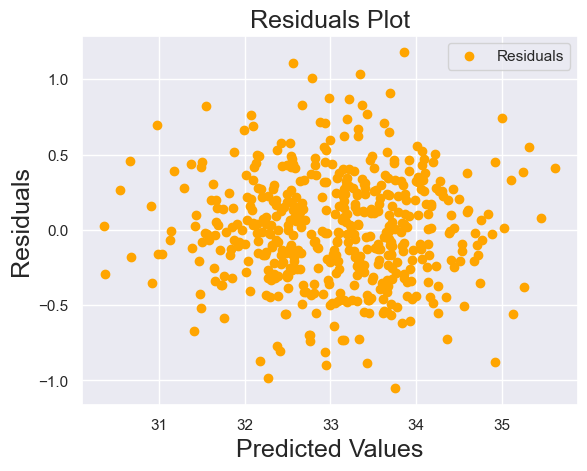

In [41]:
plt.scatter(predicted,residuals,c='orange',label='Residuals')
plt.xlabel("Predicted Values",fontsize=18)
plt.ylabel("Residuals",fontsize=18)
plt.title("Residuals Plot",fontsize=18)
plt.legend()
plt.show()

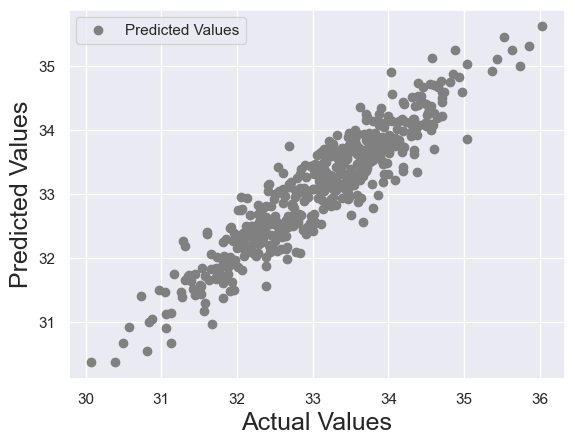

In [42]:
plt.scatter(y,predicted,c='gray',label='Predicted Values')
plt.xlabel("Actual Values",fontsize=18)
plt.ylabel("Predicted Values",fontsize=18)
plt.legend()
plt.show()

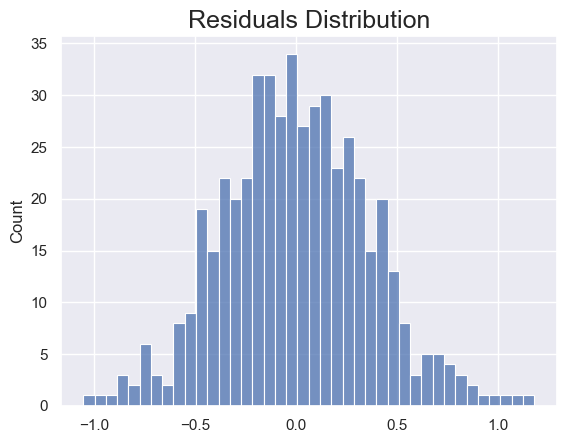

In [43]:
sns.histplot(residuals,bins=40)
plt.title("Residuals Distribution",fontsize=18)
plt.show() 

_. Note:_ <br> 1)Time on Website is not significant (p>|t| > 0.05) <br>
So that we need rebuild the model without Time on Website feature and make final assessment and build my recommendation to help descision makers